# Titanic Data to attempt to detect the survivors from the features given
 ## Exploration of Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### creation of a new Column "Title"

In [4]:


df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [5]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Sir           1
Jonkheer      1
Lady          1
Countess      1
Ms            1
Capt          1
Don           1
Name: Title, dtype: int64

### Filling 'Age' with median value according to Title

In [6]:
#manually filling the NaNs of the column "Age"
df['Age'].fillna(df.groupby('Title')['Age'].transform('median'), inplace=True)

### The column "Cabin"

In [7]:
# manually fill rest of cabins after keeping just the first character 
df['Cabin']=df['Cabin'].transform(lambda x: x.str.slice(stop=1))

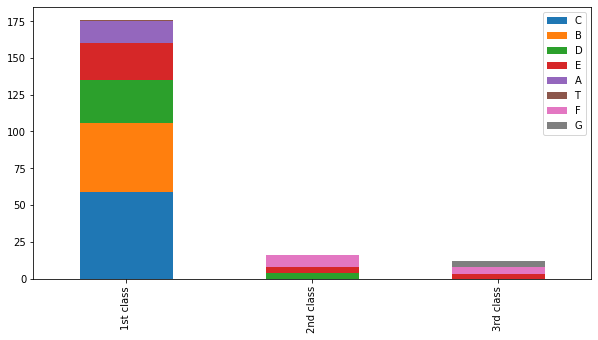

In [8]:
import matplotlib.pyplot as plt

Pclass1 = df[df['Pclass']==1]['Cabin'].value_counts()
Pclass2 = df[df['Pclass']==2]['Cabin'].value_counts()
Pclass3 = df[df['Pclass']==3]['Cabin'].value_counts()
gr= pd.DataFrame([Pclass1,Pclass2,Pclass3])
gr.index = ['1st class','2nd class', '3rd class']
gr.plot(kind='bar',stacked=True, figsize=(10,5))

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [10]:
cabin_mapping = {"A": 0,"B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2,"G": 2.4,"T": 2.8 }

df['Cabin'] =df['Cabin'].map(cabin_mapping)


In [11]:
df['Cabin'].fillna(df.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

### Creation of "Family Size"

In [12]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2.0,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.8,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2.0,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.8,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2.0,S,Mr,1


### Dropping "Name" & "Ticket"

In [14]:
#drop Ticket & Name
df.drop(['Name','Ticket'], axis=1, inplace= True)

### Defining X & y

In [15]:
X = df.loc[:, df.columns != 'Survived']
y=df['Survived']

In [16]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,1,3,male,22.0,1,0,7.2500,2.0,S,Mr,2
1,2,1,female,38.0,1,0,71.2833,0.8,C,Mrs,2
2,3,3,female,26.0,0,0,7.9250,2.0,S,Miss,1
3,4,1,female,35.0,1,0,53.1000,0.8,S,Mrs,2
4,5,3,male,35.0,0,0,8.0500,2.0,S,Mr,1


## Creation of Transformers & Pipelines

In [17]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor


#1. initialise
#titan=df[['Age','Title','Pclass']]

age_pipeline = Pipeline(steps=[
   #('imputer', SimpleImputer(strategy='mean')),
    ('ii', IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)),
    ('ss', StandardScaler())
    ])
                        
general_pipeline =  Pipeline(steps=[
   ('imputer2', SimpleImputer(strategy='most_frequent')),
    ('ohe', (OneHotEncoder(sparse=False,handle_unknown='ignore')))
    ])                       
                             
transformer = ColumnTransformer(transformers=[
    #('age', age_pipeline , ['Age']),
    ('age', age_pipeline , ['Age','Pclass']),
    ('embarked', general_pipeline, ['Embarked']),
    ('ss', StandardScaler(), ['Fare']),
    ('sex', general_pipeline, ['Sex']),
    ('pC', general_pipeline, ['Pclass']),
    ('Title', general_pipeline, ['Title']),
    ('pt', 'passthrough', ['SibSp','Parch','FamilySize'])
] )       
                             
    

## Splitting the Data to testing and training data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Fitting and Transforming Data

In [19]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train_trans = transformer.fit_transform(X_train)





In [20]:
X_test_trans = transformer.transform(X_test)


## Modelling

In [21]:
modelLR = LogisticRegression(max_iter=1000)
modelLR.fit(X_train_trans, y_train)


LogisticRegression(max_iter=1000)

In [23]:
y_pred_LR = modelLR.predict(X_test_trans)
accuracy_score(y_pred_LR, y_test)

0.8340807174887892

In [25]:
modelLR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [33]:
confusion_matrix(y_test, y_pred_LR)

array([[113,  13],
       [ 24,  73]])

In [71]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=10, random_state=0, max_features=None)
modelRF.fit(X_train_trans, y_train)


RandomForestClassifier(max_depth=10, max_features=None, random_state=0)

In [72]:
y_pred_RF = modelRF.predict(X_test_trans)
accuracy_score(y_pred_RF, y_test)

0.8340807174887892

In [29]:
modelRF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_RF)


array([[113,  13],
       [ 24,  73]])

## Cross-Validation

### cross validation for Random Forest

In [41]:
from sklearn.model_selection import cross_validate

cv_results_RF = cross_validate(
    estimator=modelRF, 
    X=X_train_trans, 
    y=y_train, 
    cv=10, 
    scoring='accuracy', 
    return_train_score=True, n_jobs=1 # n_jobs = -1 for using all your processores
)

In [42]:
cv_results_RF = pd.DataFrame(cv_results_RF)
cv_results_RF

,fit_time,score_time,test_score,train_score
0,0.169296,0.009567,0.820896,0.971714
1,0.146431,0.007651,0.895522,0.971714
2,0.155552,0.007818,0.835821,0.976705
3,0.153097,0.008015,0.865672,0.973378
4,0.153002,0.007306,0.791045,0.968386
5,0.153730,0.007963,0.731343,0.970050
6,0.154369,0.007179,0.925373,0.975042
7,0.145189,0.007657,0.835821,0.975042
8,0.157938,0.007743,0.772727,0.968439
9,0.144436,0.007643,0.803030,0.978405


In [43]:
cv_results_RF['test_score'].mean()

0.8277250113071007

### Cross-validation for Log.Reg.

In [44]:
cv_results_LR = cross_validate(
    estimator=modelLR, 
    X=X_train_trans, 
    y=y_train, 
    cv=10, 
    scoring='accuracy', 
    return_train_score=True, n_jobs=1 # n_jobs = -1 for using all your processores
)

In [45]:
cv_results_LR = pd.DataFrame(cv_results_LR)
cv_results_LR

,fit_time,score_time,test_score,train_score
0,0.024019,0.000617,0.835821,0.835275
1,0.022440,0.000461,0.895522,0.830283
2,0.019212,0.000413,0.865672,0.833611
3,0.020044,0.000412,0.895522,0.828619
4,0.018643,0.000432,0.716418,0.843594
5,0.020058,0.000434,0.746269,0.841930
6,0.020686,0.000418,0.925373,0.821963
7,0.018111,0.000441,0.776119,0.840266
8,0.017958,0.000407,0.772727,0.842193
9,0.020743,0.000440,0.772727,0.838870


# Kaggle Titanic Data Prediction

In [47]:
df_kaggle = pd.read_csv('test.csv')

In [48]:
df_kaggle.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Steps of Transforming

In [49]:
df_kaggle['Title']=df_kaggle['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#manually filling the NaNs of the column "Age"
df_kaggle['Age'].fillna(df_kaggle.groupby('Title')['Age'].transform('median'), inplace=True)

#in case there are still some missing data they should use Sex as the criteria
if len(df_kaggle[df_kaggle['Age'].isna()])>0:
    df_kaggle['Age'].fillna(df_kaggle.groupby('Sex')['Age'].transform('median'), inplace=True)
            
df_kaggle['FamilySize'] = df_kaggle['SibSp'] + df_kaggle['Parch'] + 1    
    
df_kaggle['Age'].fillna(df_kaggle.groupby('Title')['Age'].transform('median'), inplace=True)
#

# manually fill rest of cabins after keeping just the first character 
df_kaggle['Cabin']=df_kaggle['Cabin'].transform(lambda x: x.str.slice(stop=1))

cabin_mapping = {"A": 0,"B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2,"G": 2.4,"T": 2.8 }

df_kaggle['Cabin'] =df_kaggle['Cabin'].map(cabin_mapping)

df_kaggle['Cabin'].fillna(df_kaggle.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

df_kaggle['Fare'].fillna(df_kaggle.groupby('Pclass')['Fare'].transform('median'), inplace=True)

df_kaggle.drop(['Name','Ticket'], axis=1, inplace= True)

X_kaggle = df_kaggle.loc[:,:]





In [50]:
X_kaggle.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [51]:
X_kaggle_test = transformer.transform(X_kaggle)

In [52]:
y_kaggle_pred = modelRF.predict(X_kaggle_test)

In [53]:
df_kaggle.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,male,34.5,0,0,7.8292,2.0,Q,Mr,1
1,893,3,female,47.0,1,0,7.0000,2.0,S,Mrs,2
2,894,2,male,62.0,0,0,9.6875,2.0,Q,Mr,1
3,895,3,male,27.0,0,0,8.6625,2.0,S,Mr,1
4,896,3,female,22.0,1,1,12.2875,2.0,S,Mrs,3


## Submission file for Kaggle

In [54]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'PassengerId':df_kaggle['PassengerId'],'Survived':y_kaggle_pred})

#Visualize the first 5 rows
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [55]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Titanic Predictions 2.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions 2.csv


In [60]:
X_kaggle.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Title', 'FamilySize'],
      dtype='object')

In [59]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize'],
      dtype='object')

In [63]:
X_train_trans.size

18036

In [62]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Title', 'FamilySize'],
      dtype='object')

In [65]:
X_train_trans.shape

(668, 27)

In [ ]:
X_train_trans

In [26]:
#now to test several models..

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=10, random_state=0, max_features=None)
models.append(("RandomForest2",rf2))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))


results = []
names = []
for name,model in models:
    result = cross_val_score(model, df[predictors], df["Survived"],  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())
    

LogisticRegression nan
SVC nan
LinearSVC nan
KNeighbors nan
DecisionTree nan
RandomForest nan
RandomForest2 nan
MLPClassifier nan


/home/kingsley/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/kingsley/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/kingsley/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/home/kingsley/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/kingsley/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/home/kingsley/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.p

In [112]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [273]:
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [274]:
# now try different models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

models1 = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LogisticRegression':LogisticRegression(max_iter=1000),
    'SVC': SVC()
}

params1 = {
    'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
    'RandomForestClassifier': { 'n_estimators': [16, 32, 64, 128,256,512] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'LogisticRegression':{'max_iter':[1000]},
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train_trans, y_train, scoring='f1', n_jobs=2)


Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    2.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Running GridSearchCV for SVC.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.3s finished


In [275]:
helper1.score_summary(sort_by='max_score')

ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
LogisticRegression
SVC


,estimator,min_score,mean_score,max_score,std_score,n_estimators,learning_rate,max_iter,C,kernel,gamma
9,AdaBoostClassifier,0.757062,0.773812,0.802469,0.0203599,32,NaN,NaN,NaN,NaN,NaN
16,SVC,0.75,0.772156,0.8,0.020805,NaN,NaN,NaN,10,linear,NaN
15,SVC,0.75,0.774603,0.8,0.0204201,NaN,NaN,NaN,1,linear,NaN
12,GradientBoostingClassifier,0.757396,0.78336,0.8,0.0186003,16,1,NaN,NaN,NaN,NaN
8,AdaBoostClassifier,0.725275,0.762483,0.797468,0.0295148,16,NaN,NaN,NaN,NaN,NaN
5,RandomForestClassifier,0.719512,0.74282,0.78481,0.0297514,128,NaN,NaN,NaN,NaN,NaN
2,RandomForestClassifier,0.720497,0.751878,0.782051,0.025144,16,NaN,NaN,NaN,NaN,NaN
7,RandomForestClassifier,0.73494,0.750149,0.779874,0.021021,512,NaN,NaN,NaN,NaN,NaN
6,RandomForestClassifier,0.742857,0.756131,0.77707,0.0149821,256,NaN,NaN,NaN,NaN,NaN
10,GradientBoostingClassifier,0.746988,0.76295,0.774566,0.0116707,16,0.8,NaN,NaN,NaN,NaN
